In [1]:
!ls

README.md
ScrapBook.ipynb
config.py
zippedData


#zippedData names:
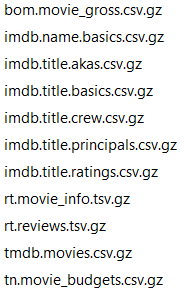

# Imports

In [2]:
import pandas as pd #main
#df = pd.DataFrame(data, columns)
#pd.read_csv(path) can use nrows, skiprows, header, use cols to filter out bad data


import numpy as np #using numpy arrays and computation, can be done in pandas
from scipy import stats # for finding the mode

import requests #for pulling data from websites
#request = requests.get(url), use param={credentials} with access tokens for API


from bs4 import BeautifulSoup #for webscraping 
import json
#with open(file.json) as f:
#    data = json.load(f)

import sqlite3 #sql
#conn = sqlite3.connect(data path)
#cur = conn.cursor()
#cur.execute(select statement;).fetch or .fetchall
#conn.close when done

from pandasql import sqldf #secondary sql using pandas
psyqldf = lambda q: sqldf(q,globals())
#pd.read_sql(query,conn)
#df.query(condition, not select)
#results = pysqldf(q) where q is the select statement
#df.eval(c=a+b) adds column C to DF where it calculates a+b

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning Strats

In [3]:
#df.loc... astype(type) converts the column(s) found to the type you want (df.loc[column].astype(int))
#pd.to_datetime(df[column with dates])
# .map for series  .apply for multiple columns  .applymap for entire dataframe
#pd.concat([df1 .... dfN]) joins dataframes vertically unless axis =1
# df1.join(...), df.merge, df.is_na().sum(), df.fillna(replacement of na)
#df.duplicated().value_counts()
#df.drop_duplicates()

# Looking at the Overall Contents of Provided Data Sets
___________

In [4]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### IMDB DataSets
___________________________________

In [6]:
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [7]:
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [8]:
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

In [9]:
imdb_title_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [213]:
imdb_title_akas.loc[imdb_title_akas['region']=="US"]

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,NaN,imdbDisplay,NaN,0.0
331654,tt9358044,2,Hail Satan?,US,NaN,imdbDisplay,NaN,0.0
331673,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0


In [10]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [11]:
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [12]:
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

In [13]:
imdb_title_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [14]:
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

In [15]:
imdb_title_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [16]:
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [17]:
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### Rotten Tomatoes Data Sets
___________________

In [18]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [19]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [20]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t',encoding='latin-1')

In [21]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [22]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [23]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [24]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [25]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# IMDB Cleaning and Merging
_____________

In [26]:
### Goals
# Find top 5 genres using Ratings and title basics
# Merge results into Principals to be the main data frame
# Merge name basics into Principals too
# Want Actors/Actress, Director, Producer, Writer, Composer
#      Should still be alive and at most 75 (steven spielbergs age)
# Want crew who worked on movies in the top 5 genres
# Figure out to do with NA values across the board for runtime minutes, 
# Group crew by average rating on their movies in the genres


## Finding the Top 5 Genres in IMDB

In [218]:
# Combining the ratings into title basics so we have all the title information
ratings = imdb_title_basics.merge(imdb_title_ratings, on = "tconst", how = "inner")

In [220]:
ratings = pd.merge(ratings, imdb_title_akas[['title_id','region']],how="left", left_on="tconst", right_on="title_id")

In [222]:
ratings = ratings.loc[ratings['region']=="US"]

In [223]:
ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_id,region
14,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,tt0069049,US
30,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32,tt0112502,US
49,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,tt0159369,US
59,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,tt0192528,US
61,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8,tt0230212,US
...,...,...,...,...,...,...,...,...,...,...
265910,tt9822474,Into the Canyon,Into the Canyon,2019,84.0,Documentary,7.7,23,tt9822474,US
265911,tt9822474,Into the Canyon,Into the Canyon,2019,84.0,Documentary,7.7,23,tt9822474,US
265951,tt9845398,End of the Century,Fin de siglo,2019,84.0,Drama,7.2,21,tt9845398,US
266011,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50,tt9875852,US


In [224]:
# Cleaning genres before unpacking them
clean_ratings = ratings.loc[ratings['genres'].dropna().index]

In [225]:
#unpacks a value into lists
def unpack(df,col,sepp):
    return df[col].fillna("").map(lambda row: row.split(sepp))

In [226]:
# Convert genres into a list in a new column
clean_ratings['genre_list'] = unpack(clean_ratings,'genres',",")

In [227]:
clean_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_id,region,genre_list
14,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,tt0069049,US,[Drama]
30,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32,tt0112502,US,"[Horror, Thriller]"
49,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,tt0159369,US,[Documentary]
59,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,tt0192528,US,[Drama]
61,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8,tt0230212,US,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...
265910,tt9822474,Into the Canyon,Into the Canyon,2019,84.0,Documentary,7.7,23,tt9822474,US,[Documentary]
265911,tt9822474,Into the Canyon,Into the Canyon,2019,84.0,Documentary,7.7,23,tt9822474,US,[Documentary]
265951,tt9845398,End of the Century,Fin de siglo,2019,84.0,Drama,7.2,21,tt9845398,US,[Drama]
266011,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50,tt9875852,US,"[Comedy, Family, Fantasy]"


In [228]:
# Create a list of unique genres
unique_genres = []
for genres in clean_ratings['genre_list'].values:
    for genre in genres:
        if genre not in unique_genres:
            unique_genres.append(genre)

In [229]:
#create a column for each unique genre, and checking if the column name is in the list of genres for each
for genre in unique_genres:
    clean_ratings[genre] = clean_ratings['genre_list'].apply(lambda x: genre in x)

In [230]:
clean_ratings.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title_id',
       'region', 'genre_list', 'Drama', 'Horror', 'Thriller', 'Documentary',
       'Action', 'Animation', 'Comedy', 'Biography', 'Crime', 'Adventure',
       'Sci-Fi', 'Mystery', 'Romance', 'Family', 'History', 'War', 'Music',
       'Fantasy', 'Sport', 'Western', 'Musical', 'News', 'Reality-TV',
       'Game-Show', 'Adult'],
      dtype='object')

In [231]:
# columns start in position 9 of this DF for future reference

In [232]:
# Create a list of average ratings, want to use the top 5 ratings
average_ratings = []
for genre in unique_genres:
    average = clean_ratings.loc[clean_ratings[genre]].loc[:,['averagerating']].mean()
    average_ratings.append([genre,average])

In [233]:
average_ratings

[['Drama',
  averagerating    6.364883
  dtype: float64],
 ['Horror',
  averagerating    4.87114
  dtype: float64],
 ['Thriller',
  averagerating    5.413401
  dtype: float64],
 ['Documentary',
  averagerating    7.357999
  dtype: float64],
 ['Action',
  averagerating    5.683582
  dtype: float64],
 ['Animation',
  averagerating    6.124617
  dtype: float64],
 ['Comedy',
  averagerating    6.12733
  dtype: float64],
 ['Biography',
  averagerating    7.228856
  dtype: float64],
 ['Crime',
  averagerating    6.077074
  dtype: float64],
 ['Adventure',
  averagerating    6.137169
  dtype: float64],
 ['Sci-Fi',
  averagerating    5.400192
  dtype: float64],
 ['Mystery',
  averagerating    5.738155
  dtype: float64],
 ['Romance',
  averagerating    6.147781
  dtype: float64],
 ['Family',
  averagerating    6.351213
  dtype: float64],
 ['History',
  averagerating    7.166165
  dtype: float64],
 ['War',
  averagerating    6.339437
  dtype: float64],
 ['Music',
  averagerating    7.069264
  dty

In [234]:
# However, want to ensure that enough ppl are voting for a fair rating (if 1 person gives a 10, that genre will be top)
average_votes = []
for genre in unique_genres:
    average = clean_ratings.loc[clean_ratings[genre]].loc[:,['numvotes']].mean()
    average_votes.append([genre,average])

In [235]:
average_votes

[['Drama',
  numvotes    12199.219827
  dtype: float64],
 ['Horror',
  numvotes    6221.989304
  dtype: float64],
 ['Thriller',
  numvotes    16495.082043
  dtype: float64],
 ['Documentary',
  numvotes    528.062229
  dtype: float64],
 ['Action',
  numvotes    56594.656209
  dtype: float64],
 ['Animation',
  numvotes    34676.596939
  dtype: float64],
 ['Comedy',
  numvotes    15305.733306
  dtype: float64],
 ['Biography',
  numvotes    13024.306799
  dtype: float64],
 ['Crime',
  numvotes    21508.103786
  dtype: float64],
 ['Adventure',
  numvotes    80985.246689
  dtype: float64],
 ['Sci-Fi',
  numvotes    69572.471867
  dtype: float64],
 ['Mystery',
  numvotes    22272.00187
  dtype: float64],
 ['Romance',
  numvotes    13362.062449
  dtype: float64],
 ['Family',
  numvotes    8290.946765
  dtype: float64],
 ['History',
  numvotes    7075.902256
  dtype: float64],
 ['War',
  numvotes    11692.232394
  dtype: float64],
 ['Music',
  numvotes    6880.805763
  dtype: float64],
 ['Fanta

In [236]:
vote_outliers = list(map(lambda x: x[1],average_votes))
pd.DataFrame(vote_outliers).describe()

,numvotes
count,25.000000
mean,18647.732529
std,21984.946487
min,37.857143
25%,5816.239092
50%,11870.537313
75%,21508.103786
max,80985.246689


In [240]:
# Want to avoid votes smaller than 2000.  The more votes the better#removing
# genres_to_remove = list(filter(lambda x: x[1].mean() < 2076, average_votes))
# genres_to_remove = list(map(lambda x: x[0], genres_to_remove))
genres_to_remove = list(filter(lambda x: x[1].mean() < 5800, average_votes))
genres_to_remove = list(map(lambda x: x[0], genres_to_remove))


In [241]:
genres_to_remove

['Documentary', 'Musical', 'News', 'Reality-TV', 'Game-Show', 'Adult']

In [242]:
# Removing the above genres, sorting the list by highest average rating and grabbing top 5 genres
average_ratings_sorted = list(filter(lambda x: x[0] not in genres_to_remove,average_ratings))
average_ratings_sorted = sorted(average_ratings_sorted,key=lambda x:x[1].mean(), reverse=True)
top_5_genres = list(map(lambda x:x[0],average_ratings_sorted[:5]))
top_5_genres

['Biography', 'History', 'Music', 'Sport', 'Drama']

## Merging the data sets onto principals

In [257]:
main_imdb = imdb_title_principals

In [258]:
#using left 'one to many' merge on tconst
main_imdb = main_imdb.merge(imdb_name_basics, how = "left", on="nconst")

In [259]:
main_imdb = main_imdb.merge(clean_ratings, how = "left", on = "tconst")

In [260]:
imdb_title_akas.head(1)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [261]:
main_imdb

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,...,War,Music,Fantasy,Sport,Western,Musical,News,Reality-TV,Game-Show,Adult
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061640,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061641,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061642,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061643,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
main_imdb[['region']].isna().value_counts()

region
True      798202
False     263443
dtype: int64

## Creating subset of data to clean and analyze

### Categories

In [249]:
main_imdb['category'].unique()

array(['actor', 'director', 'producer', 'editor', 'actress', 'composer',
       'cinematographer', 'writer', 'self', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [49]:
# Want actors/actress, director, producer, writer and composer to recommend
jobs = ['actor','actress', 'director', 'producer','writer','composer']

In [265]:
sub_imdb = main_imdb.loc[(main_imdb['category'].isin(jobs)) & (main_imdb['region'] == "US")]

In [266]:
sub_imdb['category'].unique()

array(['actress', 'actor', 'director', 'writer', 'producer', 'composer'],
      dtype=object)

In [268]:
sub_imdb['region'].isna().value_counts()

False    213648
Name: region, dtype: int64

### Dropping unused columns

In [52]:
#keeping known_for_titles, and primary_profession just in case

In [269]:
dropping_cols = []
for genre in unique_genres:
    if genre not in top_5_genres:
        dropping_cols.append(genre)
dropping_cols.append('ordering')
dropping_cols.append('job')

In [270]:
print(dropping_cols)

['Horror', 'Thriller', 'Documentary', 'Action', 'Animation', 'Comedy', 'Crime', 'Adventure', 'Sci-Fi', 'Mystery', 'Romance', 'Family', 'War', 'Fantasy', 'Western', 'Musical', 'News', 'Reality-TV', 'Game-Show', 'Adult', 'ordering', 'job']


In [271]:
sub_imdb = sub_imdb.drop(dropping_cols, axis=1)

In [272]:
sub_imdb.columns

Index(['tconst', 'nconst', 'category', 'characters', 'primary_name',
       'birth_year', 'death_year', 'primary_profession', 'known_for_titles',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'title_id', 'region',
       'genre_list', 'Drama', 'Biography', 'History', 'Music', 'Sport'],
      dtype='object')

### Checking whether crew is deceased or likely retired

In [273]:
#Do not want to use anyone with a non-null death year, or anyone over the age of 75 who is likely retired (Spielberg is 74).
sub_imdb = sub_imdb.loc[(sub_imdb['death_year'].isna() == True) & (sub_imdb['birth_year'] > 1945)]

In [274]:
sub_imdb['birth_year'].describe()

count    68732.000000
mean      1972.486687
std         11.883853
min       1946.000000
25%       1964.000000
50%       1973.000000
75%       1981.000000
max       2010.000000
Name: birth_year, dtype: float64

### Handling of NA values

In [275]:
# Dropping rows where average rating is NA, these titles were already dropped from ratings df
sub_imdb = sub_imdb.loc[sub_imdb['averagerating'].dropna().index]

In [277]:
top_5_genres

['Biography', 'History', 'Music', 'Sport', 'Drama']

In [278]:
# Dropping rows with genre not in our top 5
sub_imdb = sub_imdb.loc[(sub_imdb['Biography'] == True) |
                        (sub_imdb['History'] == True) |
                        (sub_imdb['Music'] == True) |
                        (sub_imdb['Sport'] == True) |
                        (sub_imdb['Drama'] == True) ]

In [279]:
# There are NA values in runtime minutes
sub_imdb.runtime_minutes.describe()

count    32126.000000
mean       100.273174
std         18.489453
min          3.000000
25%         90.000000
50%         97.000000
75%        109.000000
max        353.000000
Name: runtime_minutes, dtype: float64

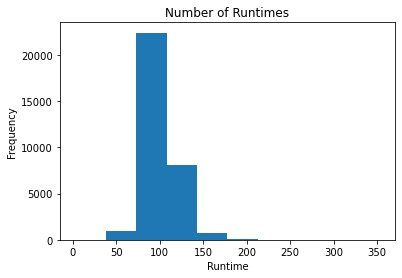

In [281]:
plt.hist(sub_imdb['runtime_minutes'].dropna());
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.title("Number of Runtimes");

In [282]:
sub_imdb['runtime_minutes'].isna().value_counts()

False    32126
True      1205
Name: runtime_minutes, dtype: int64

In [64]:
# # The 1100 appears to be NA as well, less than 5% of the data appears to be NA.  Replacing NA values with Median
# median_minutes = sub_imdb['runtime_minutes'].median()
# sub_imdb['runtime_minutes'].fillna(median_minutes, inplace=True)
# sub_imdb['runtime_minutes'].isna().value_counts()

False    14855
Name: runtime_minutes, dtype: int64

In [283]:
#less than 5% of the data appears to be NA.  Replacing NA values with Median
median_minutes = sub_imdb['runtime_minutes'].median()
sub_imdb['runtime_minutes'].fillna(median_minutes, inplace=True)
sub_imdb['runtime_minutes'].isna().value_counts()

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


False    33331
Name: runtime_minutes, dtype: int64

In [284]:
sub_imdb['runtime_minutes'].loc[sub_imdb['runtime_minutes'] == 1100] = median_minutes

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-284-5fe0dc372b63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_imdb['runtime_minutes'].loc[sub_imdb['runtime_minutes'] == 1100] = median_minutes


In [285]:
sub_imdb['runtime_minutes'].describe()

count    33331.000000
mean       100.154841
std         18.162427
min          3.000000
25%         90.000000
50%         97.000000
75%        109.000000
max        353.000000
Name: runtime_minutes, dtype: float64

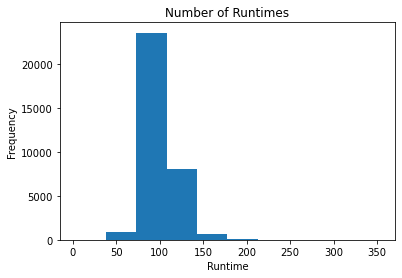

In [286]:
plt.hist(sub_imdb['runtime_minutes'])
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.title("Number of Runtimes");

In [287]:
#There appears to be outliers towards the right removing outliers using Q1-1.5xIQR amd Q3+1.5xIQR
q1 = sub_imdb['runtime_minutes'].quantile(.25)
q3 = sub_imdb['runtime_minutes'].quantile(.75)
iqr = q3-q1

In [288]:
final_imdb = sub_imdb.loc[(sub_imdb['runtime_minutes'] >= q1-1.5*iqr) & (sub_imdb['runtime_minutes'] <= q3+1.5*iqr)]

In [289]:
final_imdb

,tconst,nconst,category,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,...,averagerating,numvotes,title_id,region,genre_list,Drama,Biography,History,Music,Sport
24,tt0469152,nm0036109,actress,"[""Eleanor Jordan""]",Lucie Arnaz,1951.0,NaN,"actress,soundtrack,producer","tt0073897,tt0080948,tt0062570,tt0469152",Smoking/Non-Smoking,...,7.2,88.0,tt0469152,US,[Drama],True,False,False,False,False
25,tt0469152,nm0005253,actress,"[""Diana Whelan""]",Elisabeth Moss,1982.0,NaN,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",Smoking/Non-Smoking,...,7.2,88.0,tt0469152,US,[Drama],True,False,False,False,False
26,tt0469152,nm0002090,actor,"[""Anson""]",Zach Galligan,1964.0,NaN,"actor,director,producer","tt0087363,tt0090106,tt6038042,tt0096426",Smoking/Non-Smoking,...,7.2,88.0,tt0469152,US,[Drama],True,False,False,False,False
28,tt0469152,nm0707738,director,NaN,Alyssa R. Bennett,1960.0,NaN,"producer,director,actress","tt4610944,tt5929400,tt4194608,tt9646364",Smoking/Non-Smoking,...,7.2,88.0,tt0469152,US,[Drama],True,False,False,False,False
29,tt0469152,nm0071770,writer,NaN,Gary O. Bennett,1953.0,NaN,"writer,producer,director","tt1931412,tt4194608,tt0105215,tt6410204",Smoking/Non-Smoking,...,7.2,88.0,tt0469152,US,[Drama],True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059966,tt7946422,nm1887182,producer,NaN,Garrick Dion,1974.0,NaN,"producer,miscellaneous,executive","tt2872718,tt1038686,tt1781922,tt0780504",Prospect,...,6.1,8618.0,tt7946422,US,"[Drama, Sci-Fi, Thriller]",True,False,False,False,False
1060190,tt8193744,nm1466864,actor,NaN,Ilya Ermolov,1988.0,NaN,"actor,producer,director","tt4032214,tt8193744,tt6314086,tt2469210",Poteryannyy ostrov,...,4.2,35.0,tt8193744,US,"[Drama, Mystery, Thriller]",True,False,False,False,False
1060191,tt8193744,nm0040125,actor,NaN,Dmitriy Astrakhan,1957.0,NaN,"director,actor,producer","tt0202667,tt0101946,tt0116368,tt0108421",Poteryannyy ostrov,...,4.2,35.0,tt8193744,US,"[Drama, Mystery, Thriller]",True,False,False,False,False
1060193,tt8193744,nm0230507,actress,"[""Aleksandra Petrovna""]",Tatyana Dogileva,1957.0,NaN,"actress,director","tt0211947,tt0098990,tt5206876,tt0085251",Poteryannyy ostrov,...,4.2,35.0,tt8193744,US,"[Drama, Mystery, Thriller]",True,False,False,False,False


## Creating subset dataframes for each category

In [290]:
#define a function that will group the df by mean(average_rating) for each genre

In [291]:
#pull out each genre where true
# pull out each category
#  groupby primary_name and mean(average rating)
#  sort by average rating
#  pull out top 5

In [292]:
def genre_pull(df,genre):
    return df.loc[df[genre] == True]
def category_pull(df, category):
    return df.loc[df['category'] == category]

In [293]:
def top_5_cat(df, genre, category):
    data = category_pull(genre_pull(df,genre),category)
    grouped_data = data[['primary_name','averagerating']].groupby('primary_name').mean()
    return grouped_data.sort_values(by = "averagerating",ascending = False).head()
def top_cats(df, genre, category):
    data = category_pull(genre_pull(df,genre),category)
    grouped_data = data[['primary_name','averagerating']].groupby('primary_name').mean()
    return grouped_data.sort_values(by = "averagerating",ascending = False)
    

In [294]:
top_5_cat(final_imdb,"Biography","actor")

,averagerating
primary_name,
Frank Whaley,9.5
Feodor Chin,9.1
David Huynh,9.1
Mattia Amadori,9.0
Max de Ponti,9.0


In [295]:
top_bio_actors = top_cats(final_imdb,"Biography","actor")

In [190]:
top_bio_actors.reset_index()

,primary_name,averagerating
0,Giorgi Megrelishvili,9.6
1,Frank Whaley,9.5
2,Roland Rába,9.2
3,Pál Mácsai,9.2
4,Feodor Chin,9.1
...,...,...
1617,Ismail Hakki Ürün,1.8
1618,Alvin Anson,1.7
1619,Robin Padilla,1.7
1620,Nick Thomas-Webster,1.3


<AxesSubplot:xlabel='averagerating', ylabel='primary_name'>

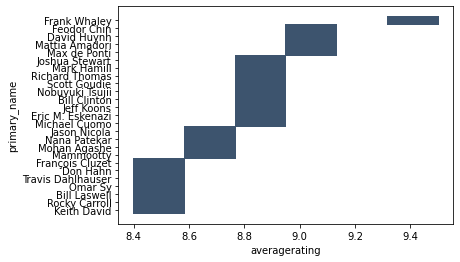

In [298]:
sns.histplot(data=top_bio_actors.head(25), y="primary_name", x= "averagerating")

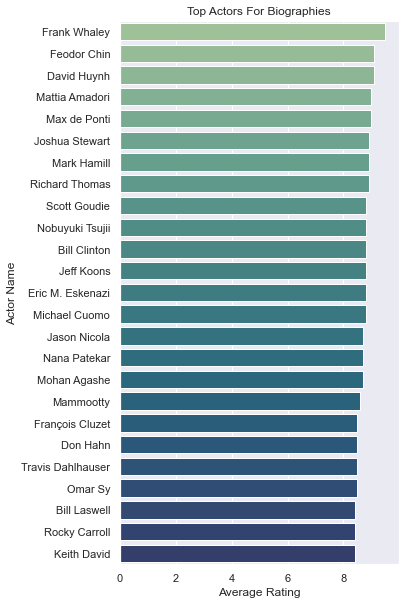

In [495]:
axis = sns.barplot(x="averagerating", y="primary_name", data=top_bio_actors.reset_index().head(25), palette="crest")
axis.set_title("Top Actors For Biographies")
axis.set_xlabel("Average Rating")
axis.set_ylabel("Actor Name")
sns.set(rc={'figure.figsize':(5,5)})

In [76]:
jobs

['actor', 'actress', 'director', 'producer', 'writer', 'composer']

In [320]:
top_5_genres

['Biography', 'History', 'Music', 'Sport', 'Drama']

## Run Time per Genre

In [323]:
runtime_df = final_imdb[['tconst','runtime_minutes','averagerating','Biography','Music','History','Sport','Drama']]


In [324]:
runtime_df = runtime_df.drop_duplicates()

In [325]:
runtime_df

,tconst,runtime_minutes,averagerating,Biography,Music,History,Sport,Drama
24,tt0469152,84.0,7.2,False,False,False,False,True
37,tt0475290,106.0,6.3,False,True,False,False,True
50,tt0477302,129.0,6.9,False,False,False,False,True
68,tt0780548,110.0,6.4,True,False,False,False,False
755,tt1078591,97.0,5.4,False,False,False,False,True
...,...,...,...,...,...,...,...,...
1059314,tt7311634,84.0,7.8,False,False,False,True,False
1059817,tt7783966,98.0,6.6,False,False,False,False,True
1059960,tt7946422,100.0,6.1,False,False,False,False,True
1060190,tt8193744,85.0,4.2,False,False,False,False,True


In [342]:
# Create a function to group values for plotting
def genre_grouper(df,genre):
    return genre_pull(df,genre)[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')

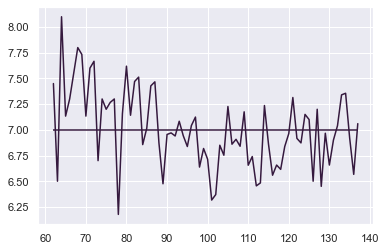

In [326]:
#create line graphs rating vs run time
bio_times = genre_pull(runtime_df,"Biography")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(bio_times);
plt.hlines(bio_times['averagerating'].mean(), bio_times.index.min(), bio_times.index.max());
# REMEMBER TO TITLE AND LABEL ***************************************

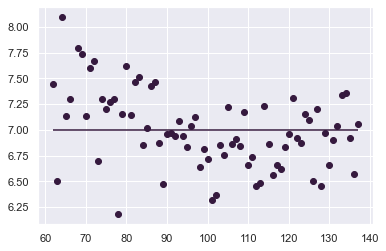

In [327]:
#scatter plots are clearer
plt.scatter(bio_times.index,bio_times['averagerating'])
plt.hlines(bio_times['averagerating'].mean(), bio_times.index.min(), bio_times.index.max());

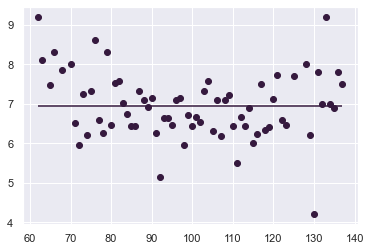

In [328]:
music_times = genre_pull(runtime_df,"Music")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.scatter(music_times.index,music_times['averagerating'])
plt.hlines(music_times['averagerating'].mean(), music_times.index.min(), music_times.index.max());

# plt.plot(music_times);
# REMEMBER TO TITLE AND LABEL ***************************************

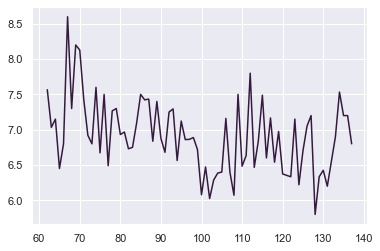

In [329]:
history_times = genre_pull(runtime_df,"History")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(history_times);

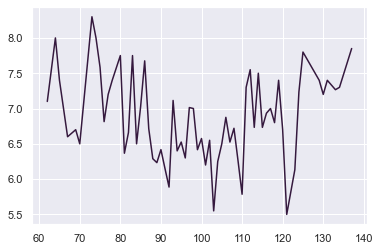

In [330]:
sport_times = genre_pull(runtime_df,"Sport")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(sport_times);

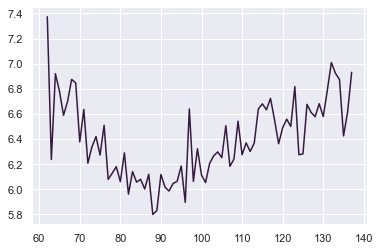

In [331]:
drama_times = genre_pull(runtime_df,"Drama")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(drama_times);

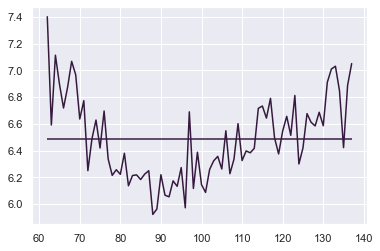

In [332]:
runtimes = runtime_df[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(runtimes);
plt.hlines(runtimes['averagerating'].mean(), runtimes.index.min(), runtimes.index.max());

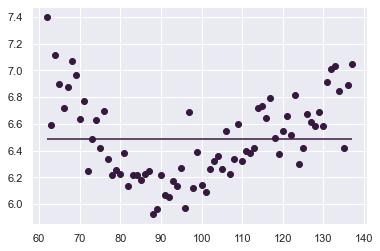

In [333]:
plt.scatter(runtimes.index,runtimes['averagerating']);
plt.hlines(runtimes['averagerating'].mean(), runtimes.index.min(), runtimes.index.max());

In [335]:
top_5_genres

['Biography', 'History', 'Music', 'Sport', 'Drama']

In [346]:
bio_times = genre_grouper(runtime_df,"Biography")
history_times = genre_grouper(runtime_df,"History")
music_times = genre_grouper(runtime_df,"Music")
sport_times = genre_grouper(runtime_df,"Sport")
drama_times = genre_grouper(runtime_df,"Drama")

(5.2, 9.45)

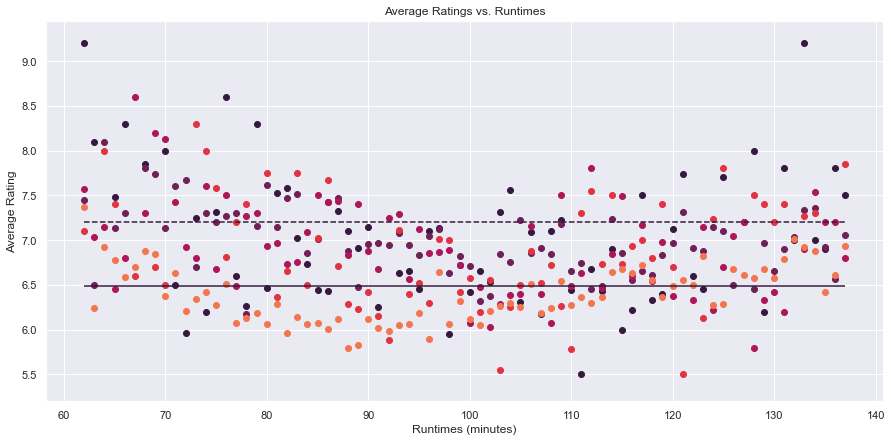

In [395]:
fig, ax1 = plt.subplots(figsize = (15,7))
# ax1 = fig.add_subplot(1,5, (1,1))
ax1.scatter(music_times.index,music_times['averagerating'])
ax1.scatter(bio_times.index,bio_times['averagerating'])
ax1.scatter(history_times.index,history_times['averagerating'])
ax1.scatter(sport_times.index,sport_times['averagerating'])
ax1.scatter(drama_times.index,drama_times['averagerating'])
ax1.hlines(runtimes['averagerating'].mean(), runtimes.index.min(), runtimes.index.max());
ax1.hlines(7.2, runtimes.index.min(), runtimes.index.max(), linestyles="dashed");

#labelling
plt.title("Average Ratings vs. Runtimes")
plt.xlabel("Runtimes (minutes)")
plt.ylabel("Average Rating")
plt.ylim(5.2)

# RT Cleaning and Merging

In [87]:
#merging the 2 RT Tables
main_rt = rt_reviews.merge(rt_movie_info, how = "left", on = "id")

In [88]:
main_rt

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [89]:
main_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   rating_x      40915 non-null  object
 3   fresh         54432 non-null  object
 4   critic        51710 non-null  object
 5   top_critic    54432 non-null  int64 
 6   publisher     54123 non-null  object
 7   date          54432 non-null  object
 8   synopsis      54300 non-null  object
 9   rating_y      54346 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
dtypes: i

In [90]:
# Creating subset to work on
sub_rt = main_rt

## Cleaning rating_x

In [91]:
sub_rt.rating_x.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [92]:
# strategy: change ratings to a percent out of 100
# assign a value to the letters F - A+
# use rotten/fresh to determine if single values (not formatted x/y) are out of 5 or 10
# drop everything else (grades beyond F, single values with NA for rotten/fresh

### Building function to clean letter ratings

In [93]:
def rating_clean(value):
    #Need to improve spread for letters E- and below
    letter_grades = {"A+":10,"A":9,"A-":8,"B+":8,"B":7,"B-":6,"C+":6,"C":5,"C-":4, "D+":4, "D":3,"D-":2,"E+":2, "E":1,"E-":0, "F+":0,"F":0,"F-":0}
    if value in letter_grades:
        return letter_grades[value]
    # handling single values
#     if ("/" not in value) and float(value):
#         number = float(value)
#         if (number < 5) and (rotten == "fresh"):
#             return number/5 * 10
#         else:
#             return number 
    # Need to handle values like 3 1/2
    if " " in value and "/" in value:
        split_mix = value.split(" ")
        num = split_mix[0]
        den = split_mix[1].split("/")
        number = float(num) + (float(den[0])/float(den[1]))
        return number
    if "/" in value:
        split = value.split("/")
        return float(split[0])/float(split[1])*10


In [94]:
# sub_rt.loc[:,['rating_x','fresh']]

In [95]:
# sub_rt.loc[0]

In [96]:
#function test
# sub_rt.apply(lambda x: rating_clean(x['rating_x'],x['fresh']))

#### Dropping NA values first

In [97]:
sub_rt = sub_rt.loc[sub_rt['rating_x'].dropna().index]

#### Changing letter ratings to values 0-10

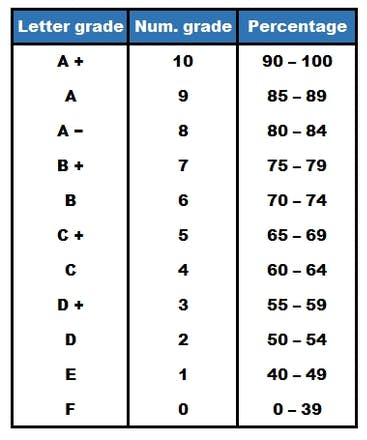

In [98]:
import IPython.display as Disp
url = 'https://studyportals-cdn2.imgix.net/59773a090d5bd.jpg?w=660&h=440&auto=format,compress&q=40'
Disp.Image(requests.get(url).content)

In [99]:
sub_rt.rating_x[13]

'B'

In [100]:
#testing function
rating_clean(sub_rt.rating_x[13])

7

#### Converting x/y into a single value

In [101]:
split_test = sub_rt.rating_x[0].split("/")

In [102]:
float(split_test[0])/float(split_test[1])*10

6.0

In [103]:
"/" in sub_rt.rating_x[0]

True

In [104]:
rating_clean(sub_rt.rating_x[0])

6.0

In [105]:
rating_clean(sub_rt.rating_x[54430])

5.0

#### Checking rotten/fresh for single values

In [106]:
test = "5.6"

In [107]:
"/" in test

False

### Create column for numbered ratings

In [108]:
sub_rt['num_rating'] = sub_rt['rating_x'].apply(lambda x: rating_clean(x))

In [109]:
sub_rt['num_rating'].describe()

count    40156.000000
mean         6.221272
std          2.113994
min          0.000000
25%          5.000000
50%          6.250000
75%          8.000000
max         15.000000
Name: num_rating, dtype: float64

In [110]:
#set ratings above 10 down to 10
sub_rt['num_rating'].loc[sub_rt['num_rating'] > 10] = 10

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [111]:
sub_rt['num_rating'].describe()

count    40156.000000
mean         6.220874
std          2.113061
min          0.000000
25%          5.000000
50%          6.250000
75%          8.000000
max         10.000000
Name: num_rating, dtype: float64

## Cleaning reviews

In [112]:
# Strategy:
# drop null reviews
# Convert the reviews into a list
# Remove the stop words from each review
# Create a dictionary for each row containing {words: [list of words], rating: num_rating}

# Convert that dictionary into a dataframe for each row
# testdf = pd.DataFrame({'words':["a","b","c"],'rating':10})

# Create a new words dataframe- build by appending each rows rating dataframe to the bottom
# group by word on average rating
# show results from the top ratings, show results from the bottom rating


### Dropping NA values first

In [113]:
sub_rt = sub_rt.loc[sub_rt['review'].dropna().index]

### Converting words in review into a list

#unpacks a value into lists
def unpack(df,col,sepp):
    return df[col].fillna("").map(lambda row: row.split(sepp))

In [114]:
sub_rt['reviews_list'] = unpack(sub_rt,'review'," ")

In [115]:
sub_rt['reviews_list']

0        [A, distinctly, gallows, take, on, contemporar...
6        [Quickly, grows, repetitive, and, tiresome,, m...
7        [Cronenberg, is, not, a, director, to, be, dau...
11       [While, not, one, of, Cronenberg's, stronger, ...
12       [Robert, Pattinson, works, mighty, hard, to, m...
                               ...                        
54420    [The, spaniel-eyed, Jean, Reno, infuses, Huber...
54421    [Manages, to, be, somewhat, well-acted,, not, ...
54422    [Arguably, the, best, script, that, Besson, ha...
54423    [Despite, the, title,, Wasabi, isn't, so, spicy.]
54424    [Dawdles, and, drags, when, it, should, pop;, ...
Name: reviews_list, Length: 35379, dtype: object

### Importing stopwords from Natural Language Toolkit and removing them from reviews

In [116]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [117]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [118]:
len(stopwords)

179

In [119]:
#the stop words are lower case, need to do the same for the words in reviews

In [402]:
#def a function to go through list of words in review and remove the stop words
def remove_stops(texts):
    cleaned = []
    punctuations = ",.!@# $%^&*()?\'\"=-_\\}{][<>:;~`/+*"
    for i in range(len(texts)):
        if texts[i].lower() not in stopwords:
            cleaned.append(texts[i].lower().strip(punctuations))    
    return cleaned

In [403]:
checker = ["Flatiron","is","life","discourse,","ending.","\"check"]

In [404]:
checker

['Flatiron', 'is', 'life', 'discourse,', 'ending.', '"check']

In [405]:
remove_stops(checker)

['flatiron', 'life', 'discourse', 'ending', 'check']

### create new column with dataframe of words and rating

In [406]:
sub_rt['reviews_list'] = sub_rt['reviews_list'].apply(lambda x: remove_stops(x))

In [407]:
sub_rt

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,...,writer,theater_date,dvd_date,currency,box_office,runtime,studio,num_rating,reviews_list,word_ratings
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,6.00,"[distinctly, gallows, take, contemporary, fina...",words rating 0 d...
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,5.00,"[quickly, grows, repetitive, tiresome, meander...",words rating 0 quickly 5.0 ...
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,4.00,"[cronenberg, director, daunted, scenario, anti...",words rating 0 cronenberg 4.0 ...
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,6.00,"[one, cronenberg's, stronger, films, anti-capi...",words rating 0 one ...
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,5.00,"[robert, pattinson, works, mighty, hard, make,...",words rating 0 robert 5.0 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002","Suspended from the force, Paris cop Hubert is ...",R,...,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,7.50,"[spaniel-eyed, jean, reno, infuses, hubert, mi...",words rating 0 spaniel-eyed ...
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002","Suspended from the force, Paris cop Hubert is ...",R,...,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,3.75,"[manages, somewhat, well-acted, badly, art-dir...",words rating 0 manages 3...
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002","Suspended from the force, Paris cop Hubert is ...",R,...,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,7.00,"[arguably, best, script, besson, written, years]",words rating 0 arguably 7.0 1 ...
54423,2000,"Despite the title, Wasabi isn't so spicy.",C,rotten,NaN,0,E! Online,"September 27, 2002","Suspended from the force, Paris cop Hubert is ...",R,...,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,5.00,"[despite, title, wasabi, spicy]",words rating 0 despite 5.0 1 tit...


In [408]:
def create_pd(row):
    return pd.DataFrame({'words': row['reviews_list'],'rating':row['num_rating']})

In [409]:
sub_rt['word_ratings'] = sub_rt.apply(lambda x: create_pd(x), axis = 1)

In [410]:
sub_rt['word_ratings'].iloc[0]

,words,rating
0,distinctly,6.0
1,gallows,6.0
2,take,6.0
3,contemporary,6.0
4,financial,6.0
5,mores,6.0
6,one,6.0
7,absurdly,6.0
8,rich,6.0
9,man's,6.0


## Creating new dataframe with all words and ratings they're associated with

In [411]:
words_df = pd.DataFrame(columns = ['words','rating'])

In [412]:
for i in range(0,len(sub_rt)):
    words_df = words_df.append(sub_rt['word_ratings'].iloc[i])

In [413]:
words_df

,words,rating
0,distinctly,6.0
1,gallows,6.0
2,take,6.0
3,contemporary,6.0
4,financial,6.0
...,...,...
7,violence,3.0
8,break,3.0
9,tedium,3.0
10,generational,3.0


In [414]:
grouped_words = words_df.groupby(['words']).agg(['mean','count'])

In [447]:
grouped_words['rating']['count'].astype(int)

words
                    4833
a-by-the-numbers       1
a-ca-trocious          1
a-changin              0
a-feature              1
                    ... 
zwart                  1
zwellinger             1
zwick                  3
zwick's                1
zzzzs                  1
Name: count, Length: 36242, dtype: int32

In [459]:
count_df = grouped_words['rating']['count'].astype(int)

In [469]:
final_words = grouped_words.loc[grouped_words.index.isin(count_df.loc[count_df > 50].index)]

In [472]:
positive_words = final_words['rating']['mean'].sort_values(ascending=False)

In [474]:
positive_words.head(25)

words
masterpiece      8.872378
coen             8.729167
carol            8.524590
artist           8.483333
selma            8.439286
finest           8.409420
billboards       8.350877
brilliantly      8.215517
mesmerizing      8.137963
cumberbatch      8.135849
hustle           8.135246
wonderfully      8.072149
silver           8.048333
year's           7.955224
woody            7.951613
heartbreaking    7.937705
beautifully      7.927374
skyfall          7.919492
astonishing      7.913462
mcdormand        7.910714
achievement      7.902344
haunting         7.899306
poignant         7.892857
triumph          7.881410
superb           7.868137
Name: mean, dtype: float64

In [475]:
positive_words.tail(25)

words
dumb           4.730603
forgettable    4.645833
fails          4.636792
stupid         4.631944
worse          4.620866
bland          4.585437
wasted         4.583333
derivative     4.533088
supposed       4.514493
badly          4.503731
ugly           4.485577
camp           4.483607
painfully      4.465179
lazy           4.444079
mess           4.414888
dull           4.292063
worst          4.259804
boring         4.171269
offensive      4.125000
awful          4.066327
tedious        4.005747
pointless      3.848118
waste          3.793860
lame           3.734615
unfunny        3.053797
Name: mean, dtype: float64

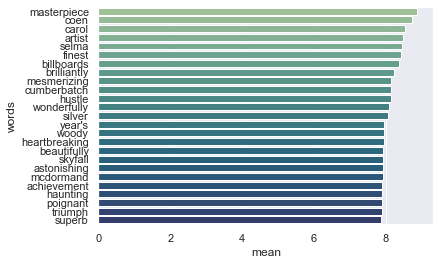

In [484]:
sns.barplot(x="mean", y="words", data=positive_words.reset_index().head(25), palette="crest");

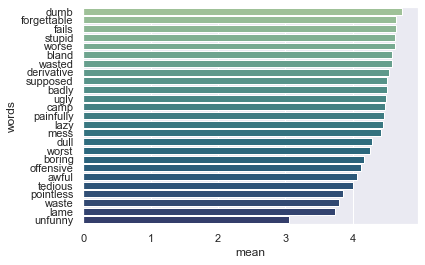

In [485]:
sns.barplot(x="mean", y="words", data=positive_words.reset_index().tail(25), palette="crest");

# SUPERCEDED
##### Want to use: name basics, title basics, title crew, title ratings

##### Name basics require unpacking professions and known for titles from strings to lists

imdb_name_basics

imdb_name_basics.info()

imdb_name_basics['primary_profession'].fillna("").map(lambda prof: prof.split(","))

unpack(imdb_name_basics,'primary_profession',",")

cleaned_imdb_name_basics = imdb_name_basics

cleaned_imdb_name_basics['primary_profession'] = unpack(cleaned_imdb_name_basics,'primary_profession',",")

cleaned_imdb_name_basics['known_for_titles'] = unpack(cleaned_imdb_name_basics,'known_for_titles',',')

cleaned_imdb_name_basics['is_producer'] = cleaned_imdb_name_basics['primary_profession'].apply(lambda x: "producer" in x)

cleaned_imdb_name_basics['is_writer'] = cleaned_imdb_name_basics['primary_profession'].apply(lambda x: "writer" in x)

cleaned_imdb_name_basics['is_acting'] = cleaned_imdb_name_basics['primary_profession'].apply(lambda x: ("actor" in x) or ("actress" in x))

cleaned_imdb_name_basics['is_director'] = cleaned_imdb_name_basics['primary_profession'].apply(lambda x: "director" in x)

cleaned_imdb_name_basics

cleaned_imdb_name_basics['known_for_titles'].apply(lambda x: len(x)).max()

imdb_main = imdb_title_principals.merge(cleaned_imdb_name_basics,how="left", on="nconst")

imdb_title_principals.info()

cleaned_imdb_name_basics.info()

cleaned_imdb_name_basics['nconst'].isna().value_counts()

imdb_main.info()

imdb_main

imdb_main['category'].isna().value_counts()

clean_ratings.loc[:,['tconst','averagerating']].groupby(by='tconst').mean()

# Cleanup Tests for IMDB

## Merging the Data sets

#unpacks a value into lists
def unpack(df,col,sepp):
    return df[col].fillna("").map(lambda row: row.split(sepp))

### IMDB Merge

#merging the IMDB databases on principals

main_imdb = imdb_title_principals

main_imdb = main_imdb.merge(imdb_name_basics, how = "left", on="nconst")

main_imdb = main_imdb.merge(imdb_title_basics, how = "left", on = "tconst")

#clean the ratings first, then merge into the main tab
main_imdb = main_imdb.merge(imdb_title_ratings, how = "left", on = "tconst")

main_imdb

### Rotten Tomatoes Merge

main_rt = rt_reviews.merge(rt_movie_info, how = "left", on = "id")

main_rt

## IMDB Data Cleaning

main_imdb.info()

main_imdb

### Unpacking Genres

main_imdb['genres'].values

#creating new column converting string to a list of genres
main_imdb['genre_list'] = unpack(main_imdb,'genres',",")

main_imdb['genre_list'].values

#generating a list of unique genres
unique_genres = []
for genres in main_imdb['genre_list'].values:
    for genre in genres:
        if genre not in unique_genres:
            unique_genres.append(genre)
    

unique_genres

len(unique_genres)

#creating a column for each unique genre, and checking if the column name is in the list of genres for each
for genre in unique_genres:
    main_imdb[genre] = main_imdb['genre_list'].apply(lambda x: genre in x)

main_imdb['Comedy'].value_counts()

main_imdb

main_imdb['category'].unique()

main_imdb.info()

### Checking Deceased Status or Retirement Age

#Do not want to use anyone with a non-null death year, or anyone over the age of 75 who is likely retired (Spielberg is 74).
main_imdb.loc[(main_imdb['death_year'].isna() == True) & (main_imdb['birth_year'] > 1945)]

main_imdb.loc[(main_imdb['death_year'].isna() == True) & (main_imdb['birth_year'] > 1945)]

### Top 5 Genres using Title Basics and Title Genres

ratings = imdb_title_basics.merge(imdb_title_ratings, on = "tconst", how = "inner")

ratings

ratings['averagerating'].isna().value_counts()

ratings['averagerating'].describe()

ratings['genres'].isna().value_counts()

clean_ratings = ratings.loc[ratings['genres'].dropna().index]

clean_ratings

clean_ratings['genre_list'] = unpack(clean_ratings,'genres',",")

for genre in unique_genres:
    clean_ratings[genre] = clean_ratings['genre_list'].apply(lambda x: genre in x)

clean_ratings.loc[clean_ratings['Comedy']].loc[:,['averagerating']].mean()

clean_ratings['start_year'].describe()

average_ratings = []
for genre in unique_genres:
    average = clean_ratings.loc[clean_ratings[genre]].loc[:,['averagerating']].mean()
    average_ratings.append([genre,average])

average_ratings

average_votes = []
for genre in unique_genres:
    average = clean_ratings.loc[clean_ratings[genre]].loc[:,['numvotes']].mean()
    average_votes.append([genre,average])

average_votes

vote_outliers = list(map(lambda x: x[1],average_votes))
pd.DataFrame(vote_outliers).describe()

pd.DataFrame(vote_outliers).describe()

#do not want to pick categories with less than 2076 average votes

#removing
genres_to_remove = list(filter(lambda x: x[1].mean() < 2076, average_votes))
genres_to_remove = list(map(lambda x: x[0], genres_to_remove))
average_ratings_sorted = list(filter(lambda x: x[0] not in genres_to_remove,average_ratings))
average_ratings_sorted = sorted(average_ratings_sorted,key=lambda x:x[1].mean(), reverse=True)
top_5_genres = list(map(lambda x:x[0],average_ratings_sorted[:5]))
top_5_genres

average_ratings_sorted = list(filter(lambda x: x[0] not in genres_to_remove,average_ratings))

average_ratings_sorted = sorted(average_ratings_sorted,key=lambda x:x[1].mean(), reverse=True)

average_ratings_sorted.pop(2)

top_5_genres = list(map(lambda x:x[0],average_ratings_sorted[:5]))

top_5_genres

clean_ratings['runtime_minutes'].isna().value_counts()

clean_ratings.loc[clean_ratings['runtime_minutes']>50000]

clean_ratings.loc[:,['tconst','averagerating']].groupby(by='tconst').mean()

plt.hist(ratings['averagerating'])

rt_movie_info['genre'].unique()

sub_imdb['start_year'].describe()